<a href="https://colab.research.google.com/github/AdiSk325/dw_matrix_road_sign/blob/master/day4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np 
import os
import datetime

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from tensorflow.keras.utils import to_categorical

%load_ext tensorboard

import matplotlib.pyplot as plt
from skimage import color, exposure
from sklearn.metrics import accuracy_score

In [4]:
cd '/content/drive/My Drive/Colab Notebooks/dw_matrix/matrix_three/dw_matrix_road_sign'

/content/drive/My Drive/Colab Notebooks/dw_matrix/matrix_three/dw_matrix_road_sign


In [5]:
train, test = pd.read_pickle('data/train.p'), pd.read_pickle('data/test.p')
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']
X_train.shape, y_train.shape

((34799, 32, 32, 3), (34799,))

In [0]:
if y_train.ndim == 1: y_train = to_categorical(y_train)
if y_test.ndim == 1: y_test = to_categorical(y_test)

In [0]:
input_shape = X_train.shape[1:]
num_classes = y_train.shape[1]

In [0]:
def get_cnn_v1(input_shape, num_classes):
  return Sequential([
   Conv2D(filters=64, kernel_size=(3, 3), activation='relu', input_shape=input_shape),                

  Flatten(),


   Dense(num_classes, activation='softmax'),
])
  
def get_cnn_v2(input_shape, num_classes):
  return Sequential([
   Conv2D(filters=64, kernel_size=(3, 3), activation='relu', input_shape=input_shape),                
   MaxPool2D(),
   Dropout(0.5),

   Conv2D(filters=32, kernel_size=(3, 3), activation='relu'),                
   MaxPool2D(),
   Dropout(0.3),

   Flatten(),

   Dense (1024, activation='relu'),
   Dropout(0.5),
   Dense(num_classes, activation='softmax'),
])
  
def train_model(model, X_train, y_train, params_fit=None):

  if params_fit is None:
    params_fit = {}

  model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])
  
  logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
  tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)
  
  model.fit(
      X_train,
      y_train,
      batch_size = params_fit.get('batch_size', 128),
      epochs = params_fit.get('epochs', 5),
      verbose=params_fit.get('verbose',1),
      validation_data = params_fit.get('validation_data', (X_train, y_train)),
      callbacks= [tensorboard_callback]
      )
  return model

def trained_and_predict(model):

  model_trained = train_model(model, X_train, y_train)
  return predict(model_trained, X_test, y_test)

In [9]:
model = get_cnn_v1(input_shape, num_classes)
model_trained = train_model(model, X_train, y_train)

Epoch 1/5
272/272 [==============================] - 3s 10ms/step - loss: 45.0800 - accuracy: 0.7240 - val_loss: 0.2557 - val_accuracy: 0.9398
Epoch 2/5
272/272 [==============================] - 2s 9ms/step - loss: 0.2214 - accuracy: 0.9503 - val_loss: 0.1373 - val_accuracy: 0.9693
Epoch 3/5
272/272 [==============================] - 3s 9ms/step - loss: 0.1326 - accuracy: 0.9695 - val_loss: 0.0832 - val_accuracy: 0.9814
Epoch 4/5
272/272 [==============================] - 2s 9ms/step - loss: 0.1301 - accuracy: 0.9719 - val_loss: 0.2157 - val_accuracy: 0.9504
Epoch 5/5
272/272 [==============================] - 2s 9ms/step - loss: 0.1400 - accuracy: 0.9713 - val_loss: 0.1198 - val_accuracy: 0.9745


In [0]:
def predict(model_trained, X_test, y_test, scoring=accuracy_score):
  
  y_test_norm = np.argmax(y_test, axis=1)

  y_pred_prob = model_trained.predict(X_test)
  y_pred = np.argmax(y_pred_prob, axis=1)

  return scoring(y_test_norm, y_pred)

In [11]:
predict(model_trained, X_test, y_test)

0.8151927437641724

In [12]:
def get_cnn_v2(input_shape, num_classes):
  return Sequential([
  Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=input_shape),                
   MaxPool2D(),
   Dropout(0.3),

   Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),                
   MaxPool2D(),
   Dropout(0.3),

   Flatten(),

   Dense (1024, activation='relu'),
   Dropout(0.3),

   Dense(num_classes, activation='softmax'),
])
  
trained_and_predict(get_cnn_v2(input_shape, num_classes))

Epoch 1/5
272/272 [==============================] - 3s 10ms/step - loss: 5.9229 - accuracy: 0.2203 - val_loss: 1.8373 - val_accuracy: 0.4952
Epoch 2/5
272/272 [==============================] - 3s 9ms/step - loss: 1.4009 - accuracy: 0.5808 - val_loss: 0.5559 - val_accuracy: 0.8615
Epoch 3/5
272/272 [==============================] - 3s 9ms/step - loss: 0.7341 - accuracy: 0.7776 - val_loss: 0.3033 - val_accuracy: 0.9346
Epoch 4/5
272/272 [==============================] - 3s 9ms/step - loss: 0.4986 - accuracy: 0.8488 - val_loss: 0.1734 - val_accuracy: 0.9482
Epoch 5/5
272/272 [==============================] - 2s 9ms/step - loss: 0.3562 - accuracy: 0.8905 - val_loss: 0.0923 - val_accuracy: 0.9819


0.9004535147392291

In [13]:
def get_cnn_v3(input_shape, num_classes):
  return Sequential([
   Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=input_shape),  
   Conv2D(filters=32, kernel_size=(3, 3), activation='relu'),              
   MaxPool2D(),
   Dropout(0.3),

   Conv2D(filters=64, kernel_size=(3, 3), activation='relu'), 
   Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),                
   MaxPool2D(),
   Dropout(0.3),

   Flatten(),

   Dense (1024, activation='relu'),
   Dropout(0.3),

   Dense(num_classes, activation='softmax'),
])
  
trained_and_predict(get_cnn_v3(input_shape, num_classes))

Epoch 1/5
272/272 [==============================] - 3s 13ms/step - loss: 2.2189 - accuracy: 0.5581 - val_loss: 0.3338 - val_accuracy: 0.9178
Epoch 2/5
272/272 [==============================] - 3s 12ms/step - loss: 0.5009 - accuracy: 0.8512 - val_loss: 0.1326 - val_accuracy: 0.9684
Epoch 3/5
272/272 [==============================] - 3s 12ms/step - loss: 0.2954 - accuracy: 0.9126 - val_loss: 0.0686 - val_accuracy: 0.9820
Epoch 4/5
272/272 [==============================] - 3s 12ms/step - loss: 0.2132 - accuracy: 0.9371 - val_loss: 0.0493 - val_accuracy: 0.9899
Epoch 5/5
272/272 [==============================] - 3s 12ms/step - loss: 0.1599 - accuracy: 0.9534 - val_loss: 0.0309 - val_accuracy: 0.9924


0.9582766439909297

In [15]:
def get_cnn_v4(input_shape, num_classes):
  return Sequential([
   Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=input_shape),  
   Conv2D(filters=32, kernel_size=(3, 3), activation='relu'),              
   MaxPool2D(),
   Dropout(0.3),

   Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'), 
   Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),                
   MaxPool2D(),
   Dropout(0.3),

   Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'), 
   Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),                
   #MaxPool2D(),
   Dropout(0.3),

   Flatten(),

   Dense (1024, activation='relu'),
   Dropout(0.3),

   Dense(num_classes, activation='softmax'),
])

get_cnn_v4(input_shape, num_classes).summary()

#break on Youtube 22:48 --> https://www.youtube.com/watch?v=R5neBdYOnBk
trained_and_predict(get_cnn_v4(input_shape, num_classes))

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 14, 14, 64)        18496     
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 12, 12, 64)        36928     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 6, 6, 64)         

0.9657596371882086

In [17]:
def get_cnn_v5(input_shape, num_classes):
  return Sequential([
   Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=input_shape),  
   Conv2D(filters=32, kernel_size=(3, 3), activation='relu'),              
   MaxPool2D(),
   Dropout(0.3),

   Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'), 
   Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),                
   MaxPool2D(),
   Dropout(0.3),

   Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'), 
   Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),                
   #MaxPool2D(),
   Dropout(0.3),

   Flatten(),

   Dense (1024, activation='relu'),
   Dropout(0.3),

   Dense (1024, activation='relu'),
   Dropout(0.3),

   Dense(num_classes, activation='softmax'),
])

get_cnn_v4(input_shape, num_classes).summary()

#break on Youtube 22:48 --> https://www.youtube.com/watch?v=R5neBdYOnBk
trained_and_predict(get_cnn_v5(input_shape, num_classes))

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_37 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
conv2d_38 (Conv2D)           (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_27 (Dropout)         (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_39 (Conv2D)           (None, 14, 14, 64)        18496     
_________________________________________________________________
conv2d_40 (Conv2D)           (None, 12, 12, 64)        36928     
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 6, 6, 64)         

0.9700680272108844

In [0]:
X_train_grey = color.rgb2gray(X_train).reshape(-1,32,32,1)
X_test_grey = color.rgb2gray(X_test).reshape(-1,32,32,1)
gray_input_shape = X_train_grey.shape[1:]

In [33]:
model = get_cnn_v5(gray_input_shape, num_classes)
model_trained = train_model(model, X_train_grey, y_train)
predict(model_trained, X_test_grey, y_test)

Epoch 1/5
272/272 [==============================] - 4s 14ms/step - loss: 2.1924 - accuracy: 0.3868 - val_loss: 0.3627 - val_accuracy: 0.8912
Epoch 2/5
272/272 [==============================] - 4s 13ms/step - loss: 0.3320 - accuracy: 0.8956 - val_loss: 0.0839 - val_accuracy: 0.9778
Epoch 3/5
272/272 [==============================] - 4s 13ms/step - loss: 0.1671 - accuracy: 0.9472 - val_loss: 0.0532 - val_accuracy: 0.9861
Epoch 4/5
272/272 [==============================] - 4s 13ms/step - loss: 0.1152 - accuracy: 0.9649 - val_loss: 0.0239 - val_accuracy: 0.9931
Epoch 5/5
272/272 [==============================] - 4s 13ms/step - loss: 0.0904 - accuracy: 0.9719 - val_loss: 0.0177 - val_accuracy: 0.9952


0.9770975056689343

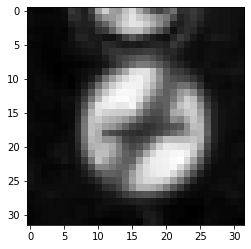

In [34]:
plt.imshow(color.rgb2gray(X_train[0]), cmap=plt.get_cmap('gray'));

In [0]:
def preproc_img(img):
  hsv = color.rgb2hsv(img)
  hsv[:,:,2] = exposure.equalize_adapthist(hsv[:,:,2])
  img = color.hsv2rgb(hsv)

  return img

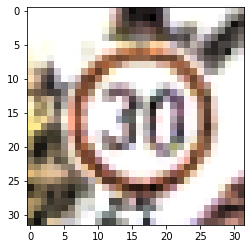

In [43]:
plt.imshow(preproc_img(X_test[400]))

In [0]:
signs_labels = pd.read_csv('data/signnames.csv').to_dict()['b']

In [0]:
signs_labels[np.argmax(y_pred_prob[400])]

'Speed limit (30km/h)'